In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open ('/kaggle/input/traffic-signs/traffic-signs-data/test.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open ('/kaggle/input/traffic-signs/traffic-signs-data/valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open ('/kaggle/input/traffic-signs/traffic-signs-data/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train=train['features'],train['labels']
X_validation, y_validation=valid['features'],valid['labels']
X_test, y_test=test['features'],test['labels']

In [4]:
X_train.shape

(12630, 32, 32, 3)

In [5]:
X_validation.shape

(4410, 32, 32, 3)

In [6]:
y_validation.shape

(4410,)

17

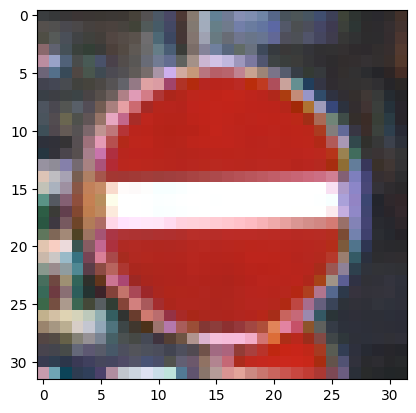

In [7]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

In [8]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train, y_train)

In [9]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims = True)

In [10]:
X_train_gray.shape


(12630, 32, 32, 1)

In [11]:
X_test_gray.shape


(12630, 32, 32, 1)

In [12]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [13]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [14]:
X_train_gray_norm

array([[[[-0.43489583],
         [-0.23958333],
         [-0.22135417],
         ...,
         [-0.2578125 ],
         [-0.24739583],
         [-0.16145833]],

        [[-0.3515625 ],
         [-0.23697917],
         [-0.20833333],
         ...,
         [-0.15364583],
         [-0.11197917],
         [-0.0625    ]],

        [[-0.25520833],
         [-0.24739583],
         [-0.1875    ],
         ...,
         [ 0.01822917],
         [ 0.20052083],
         [ 0.3984375 ]],

        ...,

        [[-0.75260417],
         [-0.70833333],
         [-0.7265625 ],
         ...,
         [-0.45572917],
         [-0.3671875 ],
         [-0.34895833]],

        [[-0.8046875 ],
         [-0.75520833],
         [-0.66927083],
         ...,
         [-0.46354167],
         [-0.40104167],
         [-0.4765625 ]],

        [[-0.82552083],
         [-0.796875  ],
         [-0.73958333],
         ...,
         [-0.48697917],
         [-0.49739583],
         [-0.56510417]]],


       [[[ 0.90104167],


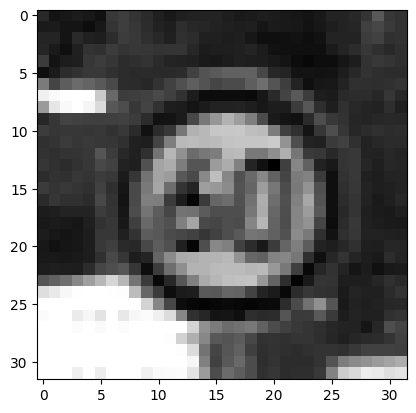

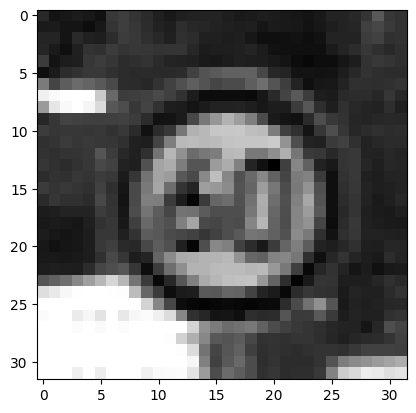

In [15]:
i=610
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')

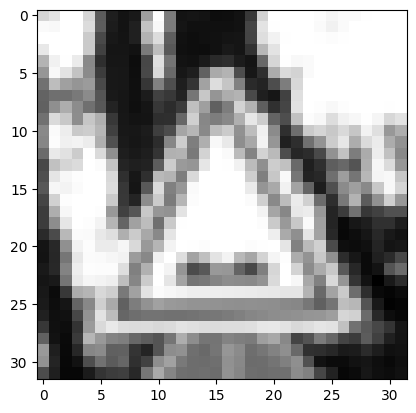

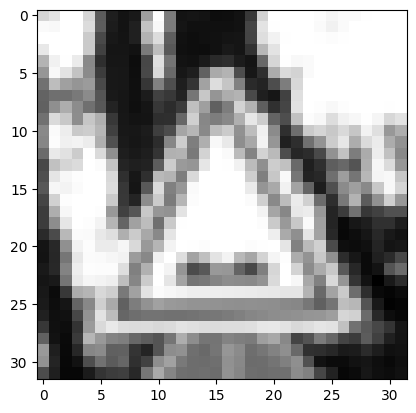

In [16]:
i=610
plt.imshow(X_validation_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_validation_gray[i])
plt.imshow(X_validation_gray_norm[i].squeeze(),cmap='gray')

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


2024-02-10 14:27:02.158038: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-10 14:27:02.158177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-10 14:27:02.328373: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6, kernel_size=(10,10), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(10,10), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())
cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation='softmax'))

In [19]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [20]:
history = cnn_model.fit(
    X_train_gray_norm, 
    y_train, 
    batch_size=1000, 
    epochs=100, 
    verbose=1, 
    validation_data=(X_validation_gray_norm, y_validation)
)

Epoch 1/100
13/13 [==============================] - 5s 317ms/step - loss: 3.7163 - accuracy: 0.0516 - val_loss: 3.6365 - val_accuracy: 0.0544
Epoch 2/100
13/13 [==============================] - 3s 255ms/step - loss: 3.4983 - accuracy: 0.0848 - val_loss: 3.5246 - val_accuracy: 0.0710
Epoch 3/100
13/13 [==============================] - 3s 253ms/step - loss: 3.3162 - accuracy: 0.1154 - val_loss: 3.4408 - val_accuracy: 0.1220
Epoch 4/100
13/13 [==============================] - 3s 257ms/step - loss: 3.1234 - accuracy: 0.1777 - val_loss: 3.2525 - val_accuracy: 0.1501
Epoch 5/100
13/13 [==============================] - 3s 252ms/step - loss: 2.8261 - accuracy: 0.2499 - val_loss: 2.9962 - val_accuracy: 0.2070
Epoch 6/100
13/13 [==============================] - 3s 255ms/step - loss: 2.4920 - accuracy: 0.3043 - val_loss: 2.7824 - val_accuracy: 0.2406
Epoch 7/100
13/13 [==============================] - 3s 260ms/step - loss: 2.1793 - accuracy: 0.3794 - val_loss: 2.4947 - val_accuracy: 0.3229

In [21]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 5ms/step - loss: 0.1222 - accuracy: 0.9702
Test Accuracy: 0.9702296257019043


In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

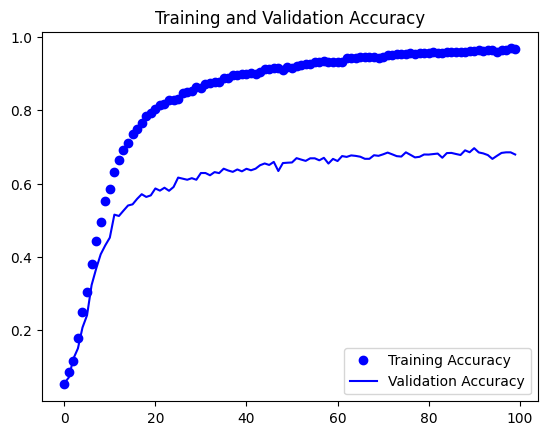

In [24]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

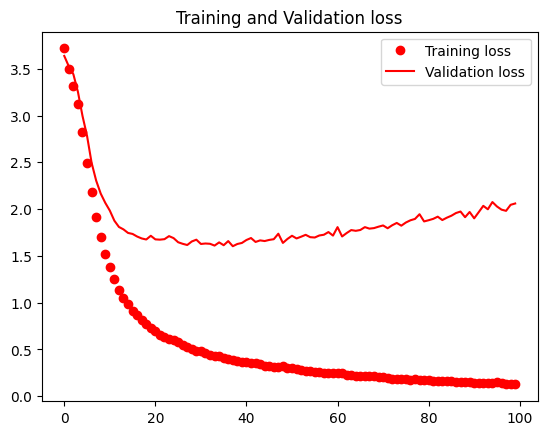

In [25]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [26]:
predicted_classes=cnn_model.predict(X_test_gray_norm)
y_true = y_test

395/395 [==============================] - 2s 5ms/step


<Axes: >

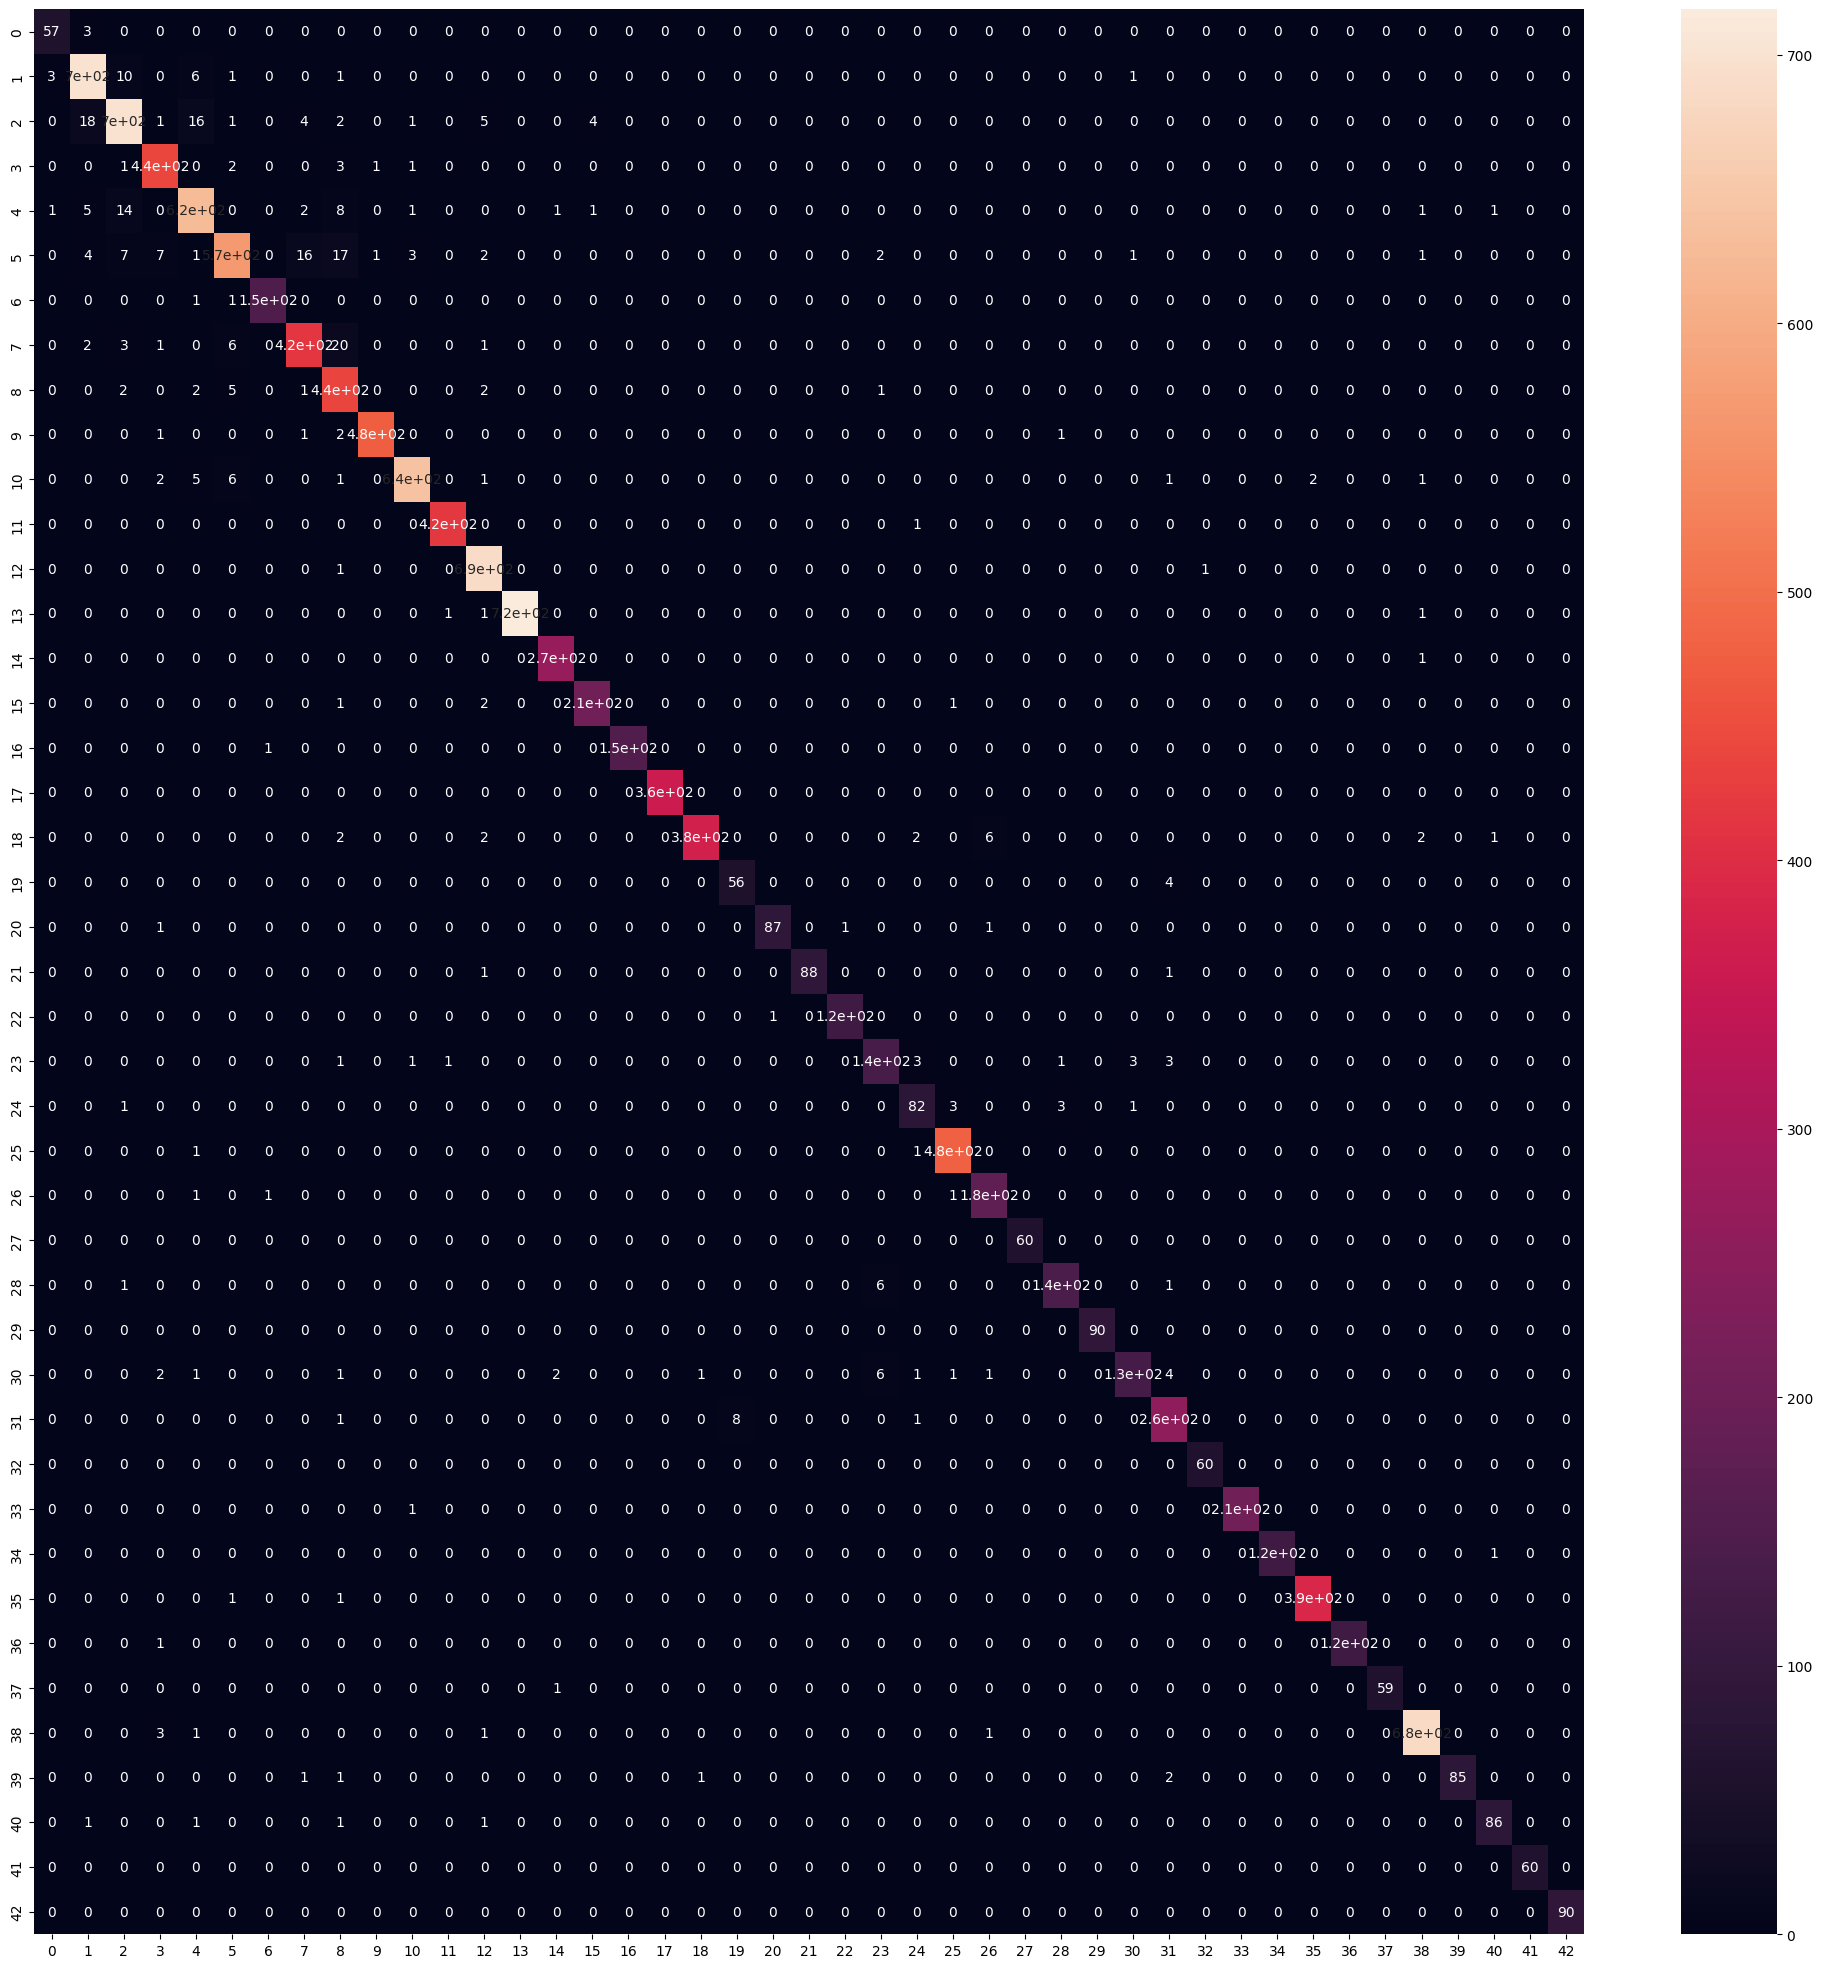

In [27]:
from sklearn.metrics import confusion_matrix
predicted_classes = np.argmax(predicted_classes, axis=1)
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

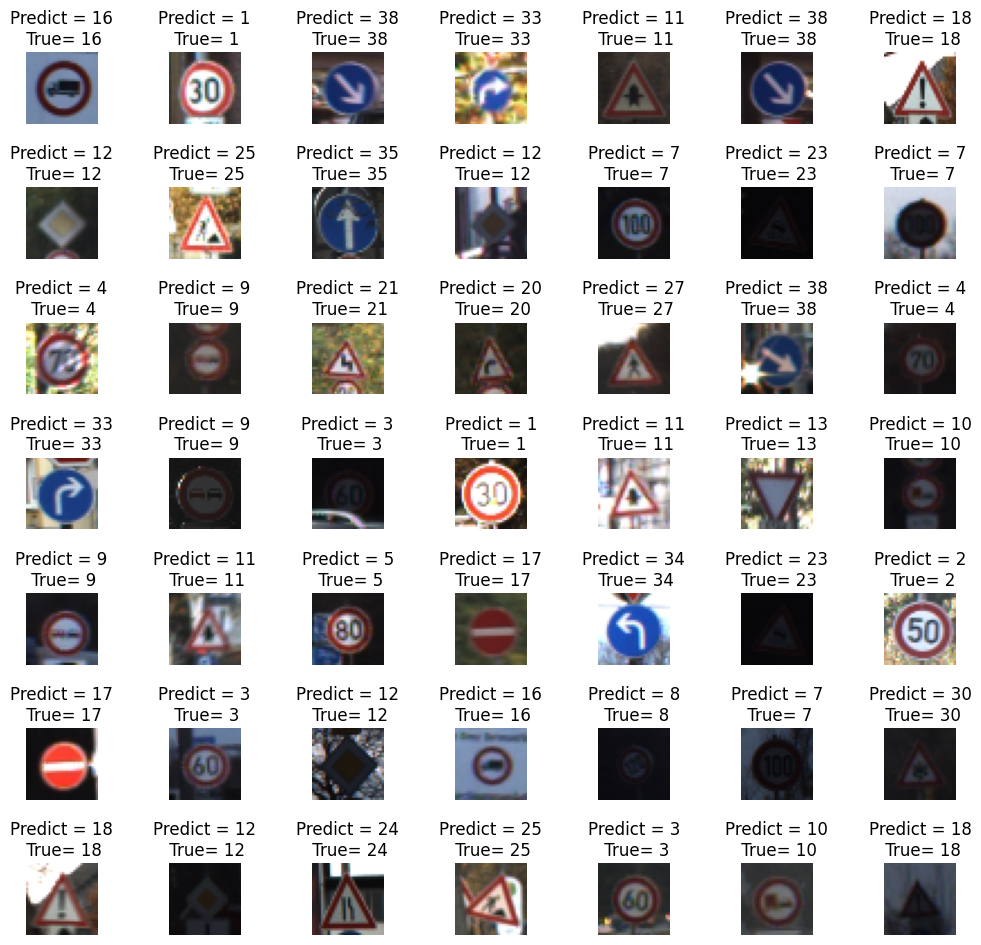

In [28]:
L = 7
W = 7
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Predict = {}\n True= {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)